<a href="https://colab.research.google.com/github/PriyankaSejwal/Hotel-Booking-Analysis/blob/main/Priyanka_Rimo_CapstoneProject_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> HOTEL BOOKING ANALYSIS

In [1]:
# Mounting the drive to access the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
# Importing necessary libraries to be used in the project

# libraries to load the dataset and to perfrom analysis on the dataset
import pandas as pd
import numpy as np

# libraries for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

# library to avoid the occurance of warnings in the output
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset from the drive

data = pd.read_csv('/content/drive/MyDrive/data file alma better/Capstone Projects/Hotel Bookings.csv')

In [ ]:
# checking the first five observations of the dataset with head() method

data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# checking the last five observations using tail() method.

data.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [ ]:
# checking the shape of the dataset

data.shape

(119390, 32)

Hotel Booking Analysis dataset has a huge number of observations. We have a whopping 1 lakh 19 thousand 3 hundred ninteen observations that are spread across 32 different features.

In [ ]:
# Checking the columns of the dataset

data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

<b>Column description:</b>
1. 'hotel' - A categorical feature having two categories 'Resort Hotel'  or 'City Hotel'.
2. 'is_canceled' - Feature containing information whether the booking was canceled(1) or not(0).
3. 'lead_time'- Lead time is the number of dates passed between the entering date of the booking and the arrival date.
4. 'arrival_date_year'- year of the arrival date takes values 2015, 2016 and 2017.
5. 'arrival_date_month'-  month of arrival from january to december.
6. 'arrival_date_week_number' - week number for the arrival date, ranges between 1-52.
7. 'arrival_date_day_of_month'- day of arrival date, ranges between 1-31.
8. 'stays_in_weekend_nights'- number of weekend nights that the guest stayed in for or have made booking for. 
9. 'stays_in_week_nights'- Number of week nights ( Mon-Fri) that the guest stayed in for or booked for.
10. 'adults'- number of adults
11. 'children'- Numer of children accompanied.
12. 'babies'- Number of babies 
13. 'meal'- Type of meal booked. A categorical feature in which 
* undefined means no meal booked.
* BB - Bed and breakfast.
* HB - Half Board ( Breakfast + one other meal)
* FB - Full Board ( Breakfast, lunch and dinner)
* SC - Self Catering
* Undefined - where the customer has not opted for any meal type.
14. 'country'- Country of origin. 
15. 'market_segment' - Booking made through which market segment. A categorical variable containing categories - 
*   Online TA/TO -  online through travel agent or travel operator.
*   Offline TA/TO - booked offline through tour agent or tour operator.
*   Groups - bookings which are part of a group.
*   Direct - bookings done directly by an individual.
*   Corporate - Booking that are a part of a corporate group.
*   Complementary - Complementary booking.
*   Aviation - Bookings made by aviations groups
*   Undefined - Bookings sources unknown.
16. 'distribution_channel' - The different booking distribution channels.
17. 'is_repeated_guest'- value indicating whether the booking name was from list of previous guests(1) or not(0).
18. 'previous_cancellations'- Number of previous bookings that were cancelled by the customer prior to the current booking.
19. 'previous_bookings_not_canceled'- Number of previous bookings not cancelled by the customer prior to the current booking.
20. 'reserved_room_type' - A categorical variable either A, B, C D, E, F, G, H, P and L consisting information on room type. 
21. 'assigned_room_type'- Category of room type assigned to the  booking. Sometimes room type booked differs from room type assigned due to the unavailability of the room type booked. 
22. 'booking_changes'- Number of amendments made to the booking. 
23. 'deposit_type'- whether a customer has made any deposit to confirm the booking. A categorical variable assumes three categories- 
No deposit- no deposit was made, 
Non-refundable- a deposit was made in the value of the total stay cost.
Refundable- a deposit was made with a value under the total cost of stay.
24. 'agent'- ID of the travel agency that made the booking.
25. 'company'- ID of the company responsible for the making the booking or the payment. A categorical variable almost 94% of the values are missing.
25. 'days_in_waiting_list'- Number of days the booking was in waiting list till the booking was confirmed to the customer.
26. 'customer_type'- Type of booking, it assumes one of the four categories.
* Contract - when the booking has an allotment or other type of contract associated to it
* Group- when the booking is a part of a group.
* Transient – when the booking is not part of a group or contract, and is not associated to other transient booking
* Transient-party – when the booking is transient, but is associated to at least other transient booking
27. 'adr'- Average Daily Rate is defined by dividing the sum of all lodging transactions by the total number of staying nights.
28. 'required_car_parking_spaces'- Number of car parking spaces required by the customer.
29. 'total_of_special_requests'- Number of special requests made by the customer.
30. 'reservation_status' - Reservation's last status, a categorical variable assuming one of the three categories: 
* Canceled – booking was canceled by the customer
* Check-Out – customer has checked in but already departed
* No-Show – customer did not check-in and did inform the hotel of the reason why  
31. 'reservation_status_date' - Date at which the last reservation status was set.

In [4]:
# Renaming the column adr to Average Daily Rate for simplicity

data.rename(columns={'adr':'average_daily_rate'}, inplace = True)

# checking the changed feature name
data.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# checking some basic information about different features of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<b> Observations : </b>
1. The columns of the dataset are of heterogeneous datatypes. Columns are either object, integer or float type.
2. Also we can see observe that a few columns have missing values. We need to deal with them as we proceed in the project. 
3. The float type columns are - children, company, agent and adr. Out of these four, columns- 

  a. children - contains information of the number of children along.

  b. company - might be the company code.

  c. agent - might contain the information about the agent code.

Due to the presence of null-values in these columns the datatype is float as float datatype supports the storage of NaN as a value. While dealing with the null-values of these columns, we will also change their datatypes to integer for simplicity. 


In [ ]:
# checking the missing-values in the dataset.
# displaying the percentage of missing values in the columns.

data.isnull().sum()[data.isnull().sum()!=0]/len(data)*100

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64

<b> Observations </b>
1. Feature company has 94% of records as missing records.
2. Feature agent, country and children too have missing records.

In [5]:
# Let's drop the column company which has almost 95% of the observations as missing.

data.drop('company', axis=1, inplace=True)

#checking if the column has been dropped successfully or not.
data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# Looking at the number of unique values in the column - agent.
data['agent'].nunique()

333

In [6]:
# Agent column has around 14% of the values as missing. Dropping 14% of data is not a good practice. Agent column is a numeric column with 333 unique entries.
# Replacing the missing values for column - agent with 0.

data['agent'].fillna(0, inplace = True)

In [7]:
# column - children too have missing values.
# children column is a numeric column 
# we will replace the null values with the median value as replacing with mean might end up giving us a floating value and count of children cannot be in decimals.

data['children'].fillna(data['children'].median(), inplace = True)

In [8]:
# Lastly column - country which is a categorical column having country names.
# We have a few missing values in this column too.
# Replacing the missing vaLUES with highest occuring values.

data['country'].fillna(data['country'].mode()[0], inplace = True)

In [ ]:
# checking for any missing values, if exists anymore

data.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces 

In [9]:
# Converting the datatype of the columns - children which is the count of children and agent which is ID of the travel agency.
# Both these columns are of float data type. Let's convert them to integer datatype for simplicity.

data = data.astype({'agent' : 'int', 'children' : 'int'})

In [71]:
# observations with number of adults, children and babies all as zero.

data[(data['adults']==0) & (data['children']==0) & (data['babies']==0)]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,38,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,308,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,7,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,425,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,9,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


### <b> Observation: </b>
We have 180 such observation where we can see no adults children or babies in the booking.

Let's get rid of these columns to analyse properly. 

In [73]:
# Observations with non zero adults, children or babies.

data = data[~((data['adults']==0) & (data['children']==0) & (data['babies']==0))]
data.shape

(119209, 31)

In [ ]:
# checking the statistical summary of the numerical columns.

data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,average_daily_rate,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


<b> Observation : </b>
1. The feature average_daily_rate have minimum value to be negative which is  not possible as average rate can not be negative.
2. The average cancelations are 37.04% and it deviates by 48.29% indicating lots of variations between cancelation.
3. looking at the special request column, we found that around 75% of the customers asked for one special request.

In [ ]:
# looking at the observations corresponding to the negative average daily rate
data[data['average_daily_rate'] < 0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


In [10]:
# as there is only one record we can drop the record.
data.drop(data[data['average_daily_rate']<0].index, inplace=True)

In [11]:
# statistical summary for categorical columns

#list of the categorical columns
categorical = [ col for col in data.columns if data[col].dtypes=='O']  # O stands for object datatype

data[categorical].describe()

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389,119389
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,2015-10-21
freq,79330,13877,92309,49078,56477,97870,85993,74053,104640,89613,75165,1461


* We can see the unique values of each column through describe method.

* Also the frequency of the most occured value in a column can also be checked through the statistical summary of categorical columns..




# <b>Data Visualization

For the categorical variable: hotel the number of unique categories are: 2
Number of observations belonging to each category:
----------------------------------------------------
          hotel  count
0    City Hotel  79330
1  Resort Hotel  40059


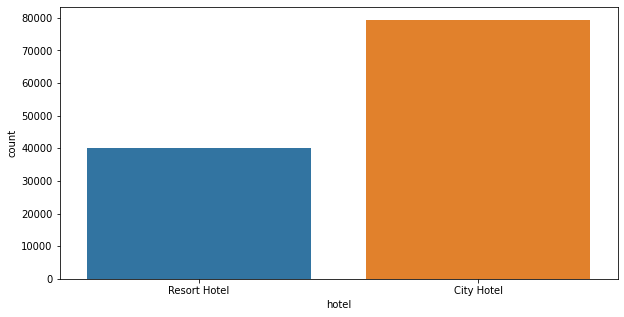




For the categorical variable: arrival_date_month the number of unique categories are: 12
Number of observations belonging to each category:
----------------------------------------------------
   arrival_date_month  count
0              August  13877
1                July  12661
2                 May  11791
3             October  11160
4               April  11089
5                June  10939
6           September  10508
7               March   9793
8            February   8068
9            November   6794
10           December   6780
11            January   5929


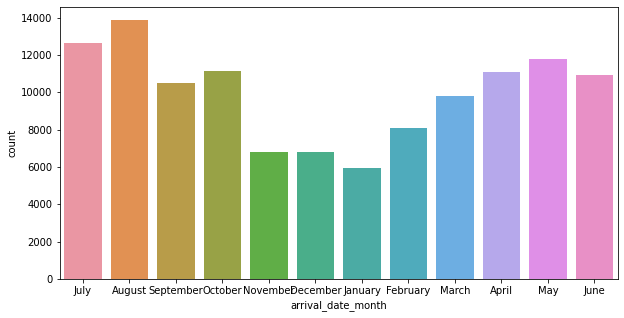




For the categorical variable: meal the number of unique categories are: 5
Number of observations belonging to each category:
----------------------------------------------------
        meal  count
0         BB  92309
1         HB  14463
2         SC  10650
3  Undefined   1169
4         FB    798


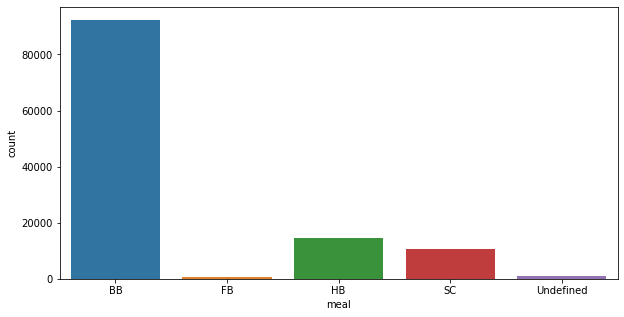




For the categorical variable: market_segment the number of unique categories are: 8
Number of observations belonging to each category:
----------------------------------------------------
  market_segment  count
0      Online TA  56477
1  Offline TA/TO  24219
2         Groups  19810
3         Direct  12606
4      Corporate   5295
5  Complementary    743
6       Aviation    237
7      Undefined      2


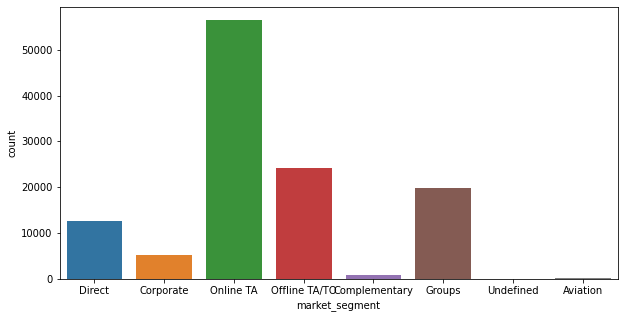




For the categorical variable: distribution_channel the number of unique categories are: 5
Number of observations belonging to each category:
----------------------------------------------------
  distribution_channel  count
0                TA/TO  97870
1               Direct  14644
2            Corporate   6677
3                  GDS    193
4            Undefined      5


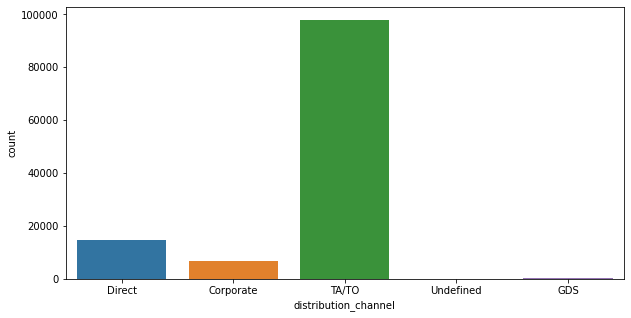




For the categorical variable: reserved_room_type the number of unique categories are: 10
Number of observations belonging to each category:
----------------------------------------------------
  reserved_room_type  count
0                  A  85993
1                  D  19201
2                  E   6535
3                  F   2897
4                  G   2094
5                  B   1118
6                  C    932
7                  H    601
8                  P     12
9                  L      6


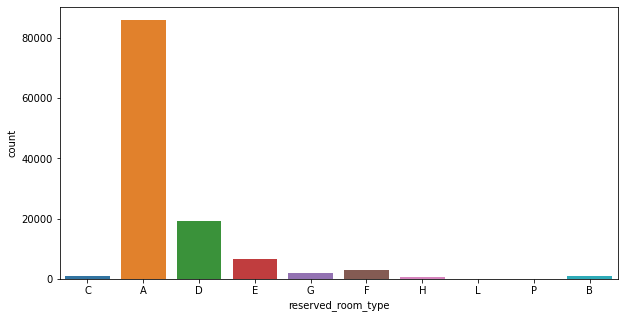




For the categorical variable: assigned_room_type the number of unique categories are: 12
Number of observations belonging to each category:
----------------------------------------------------
   assigned_room_type  count
0                   A  74053
1                   D  25322
2                   E   7806
3                   F   3751
4                   G   2553
5                   C   2375
6                   B   2163
7                   H    711
8                   I    363
9                   K    279
10                  P     12
11                  L      1


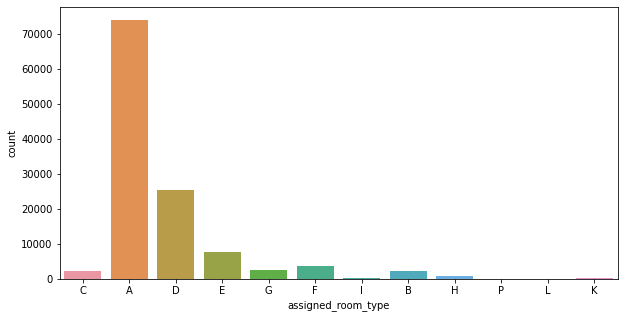




For the categorical variable: deposit_type the number of unique categories are: 3
Number of observations belonging to each category:
----------------------------------------------------
  deposit_type   count
0   No Deposit  104640
1   Non Refund   14587
2   Refundable     162


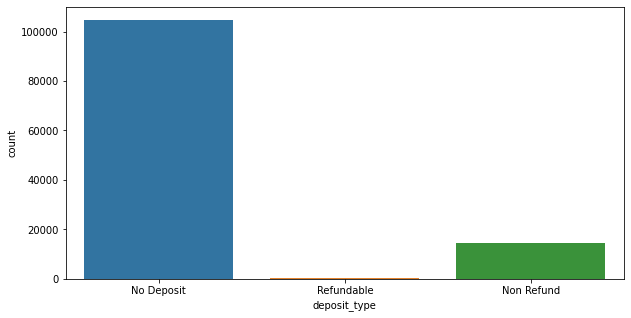




For the categorical variable: customer_type the number of unique categories are: 4
Number of observations belonging to each category:
----------------------------------------------------
     customer_type  count
0        Transient  89613
1  Transient-Party  25123
2         Contract   4076
3            Group    577


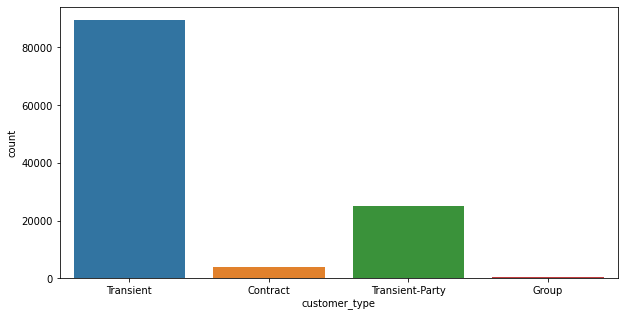




For the categorical variable: reservation_status the number of unique categories are: 3
Number of observations belonging to each category:
----------------------------------------------------
  reservation_status  count
0          Check-Out  75165
1           Canceled  43017
2            No-Show   1207


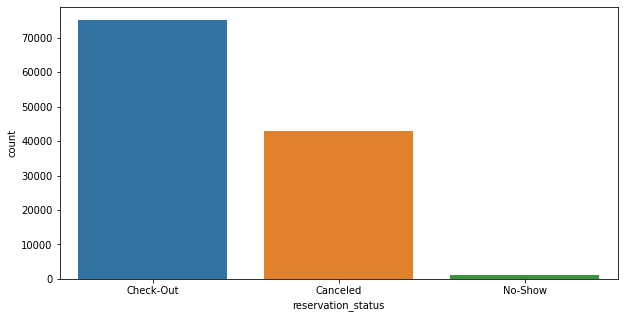

In [ ]:
# having a detailed look at the categories of the categorical variable having utmost 15 categories.
categorical=[col for col in data.columns if data[col].dtypes=='O' and data[col].nunique()<15]

for column in categorical:
  print(f"For the categorical variable: {column} the number of unique categories are: {data[column].nunique()}")
  print(f"Number of observations belonging to each category:")
  print('----------------------------------------------------')
  frames = data[column].value_counts().reset_index().rename(columns={'index':column, column:'count'})
  print(frames)
  plt.figure(figsize=(10,5))
  sns.countplot(data[column])
  plt.show()
  print('==========================================================================================')
  print('\n\n')

### <b> Number of bookings cancelled in the dataset

The number of bookings canceled are: [44199]


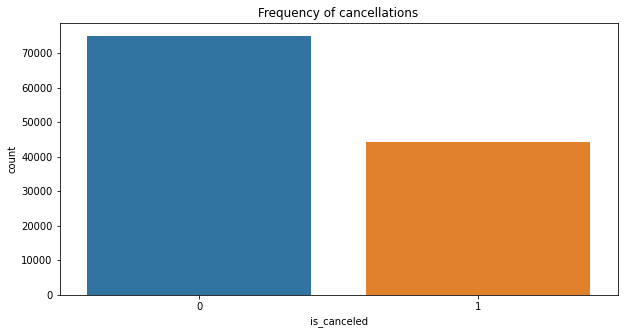

In [135]:
# Observing the frequency of bookings being cancelled.

plt.figure(figsize=(10,5))
sns.countplot(data['is_canceled'])
plt.title('Frequency of cancellations')
print(f"The number of bookings canceled are: {data.loc[data['is_canceled']==1,'is_canceled'].value_counts().values}")

### <b> Number of bookings canceled for hotel type.

In [ ]:
# looking at the hotel column first.
# Finding out the unique categories.

data['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

hotel         is_canceled
City Hotel    0              46228
              1              33102
Resort Hotel  0              28937
              1              11122
Name: is_canceled, dtype: int64


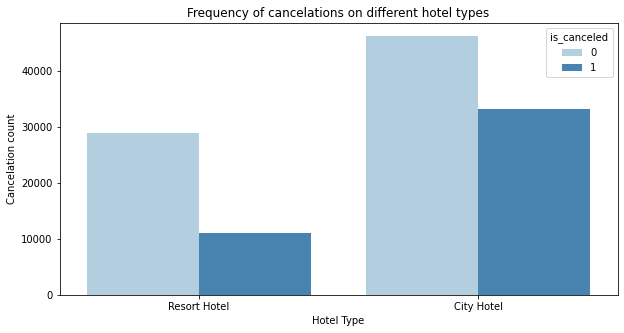

In [ ]:
# Having a look at the cancellation frequency based on different hotel type.

plt.figure(figsize=(10,5))
sns.countplot(x= data['hotel'], hue=data['is_canceled'], palette='Blues')
plt.title('Frequency of cancelations on different hotel types')
plt.xlabel('Hotel Type')
plt.ylabel('Cancelation count')
print(data.groupby('hotel')['is_canceled'].value_counts())

<b> Observation: </b>
A higher cancelations seen in city hotels cannot give us any information since the number of city hotels are booked more than resort hotels.

City Hotel      79330
Resort Hotel    40059
Name: hotel, dtype: int64


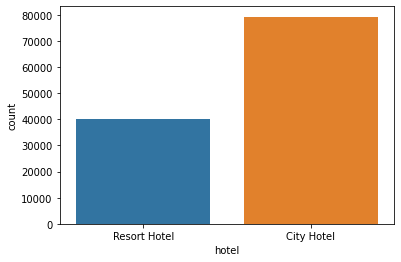

In [ ]:
# Lets look at the count of observations belonging to city hotel v/s resort hotel

print(data['hotel'].value_counts())
sns.countplot(data['hotel'])

<b> Observation: </b>

City hotel are more in records or we can say these are more booked than resort hotels this might be due to the one or more of the following reasons:
* City hotels might be cheaper than resort hotels.
* City Hotels are more in number than the resort hotels.
* Customers preference for city hotels over resort hotels due to the ambience, room quality or any other factor.

<b> Question: Which year city hotel has the most booking?

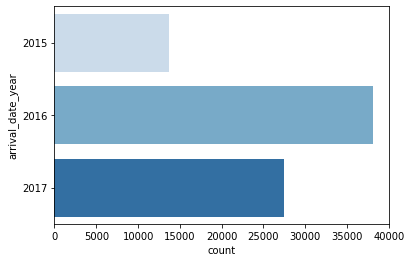

In [ ]:
# As city hotel in most booked lets deep dive into the year in which it was booked the highest.

#saving the observations for city hotel in another variable
city_hotel_data = data[data['hotel']=='City Hotel']

#visualizing the booking in different years for city hotel.
sns.countplot(y= 'arrival_date_year', data = city_hotel_data, palette='Blues')

# <b> Observation:</b>

Year 2016 can see most booking for city hotel followed by 2017 and 2015.




### <b>Question:  Which month sees the most booking in the year 2016 for city hotel?

In [ ]:
df_city_2016 = city_hotel_data.loc[city_hotel_data['arrival_date_year']==2016,'arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'Months', 'arrival_date_month':'Number of bookings'})

# creating a column which will help us sort the data according to the months in the order from january to december.
df_city_2016['map_month']=df_city_2016['Months']
mapping={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# changing the column map_month by applying mapping.
df_city_2016['map_month']=df_city_2016['map_month'].map(mapping)

# Now sorting the data according to the months name
df_city_2016.sort_values(by='map_month', inplace=True)

# Having a look at the created dataframe
df_city_2016

,Months,Number of bookings,map_month
11,January,1364,1
10,February,2371,2
8,March,3046,3
4,April,3561,4
3,May,3676,5
1,June,3923,6
6,July,3131,7
5,August,3378,8
2,September,3871,9
0,October,4219,10


Text(0.5, 1.0, 'Number of bookings made for City Hotel in different months for the year 2016')

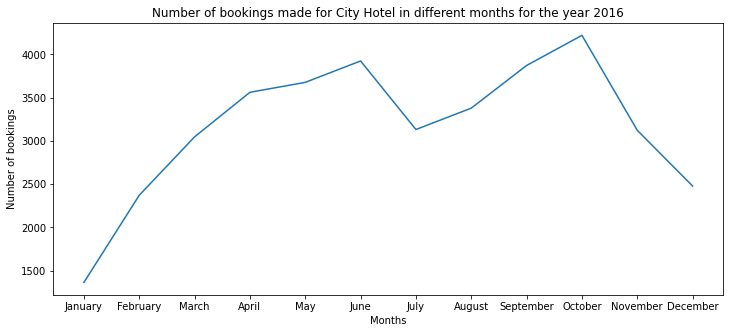

In [ ]:
# Visualizing the month and number of booking column from the above dataframe
# We will use lineplot to see the trend in booking across the different months for city hotel in the year 2016.

plt.figure(figsize=(12,5))
sns.lineplot(y= 'Number of bookings', x='Months', data=df_city_2016)
plt.title('Number of bookings made for City Hotel in different months for the year 2016')

# <b> Observation: </b>

The spike in booking can be seen in june and october for the city hotel in 2016.

<b> Preferred Month to Book a City Hotel:</b>

October is the most preferred month for booking by the customer.

In [ ]:
# Analyzing the hotel type with the cancellation  rate to see which of the two- city hotel or resort hotel gets cancelled frequently

hotel_canceled = data.loc[data['is_canceled']==0,'hotel'].value_counts(normalize=True)
hotel_canceled

City Hotel      0.61502
Resort Hotel    0.38498
Name: hotel, dtype: float64

# <b> Analysing what all factors causes cancelation of booking <b>

### <b> Effect of lead time on cancelation

In [ ]:
# grouping the cancelations data based on lead time

cancelation_due_to_lead_time = data.groupby('lead_time')['is_canceled'].mean().reset_index()

In [ ]:
# Rounding off the mean to two decimal places and converting it into percentage

cancelation_due_to_lead_time['is_canceled'] = round(cancelation_due_to_lead_time['is_canceled'],2)*100

In [ ]:
# having a look at the created dataframe to be used for visualization

cancelation_due_to_lead_time

,lead_time,is_canceled
0,0,7.0
1,1,9.0
2,2,10.0
3,3,10.0
4,4,10.0
...,...,...
474,622,100.0
475,626,100.0
476,629,100.0
477,709,0.0


Text(0.5, 0, 'lead/waiting time')

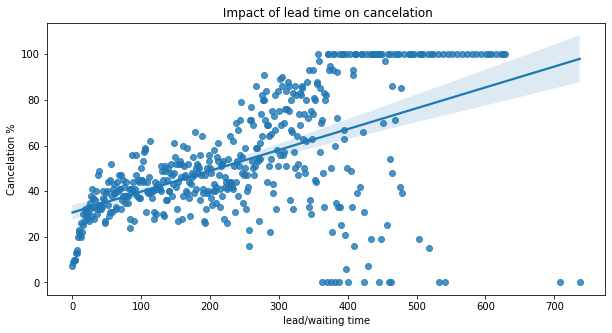

In [ ]:
# Visualizing impact of lead time on cancelation

plt.figure(figsize=(10,5))
sns.regplot(x = 'lead_time', y = 'is_canceled', data= cancelation_due_to_lead_time)
plt.title(' Impact of lead time on cancelation')
plt.ylabel('Cancelation %')
plt.xlabel('lead/waiting time')

### <b>  Observation: </b>

Lead time has an impact on the cancelation.

Higher lead time implies higher cancelation rates.

Bookings that are made longer time in advance are more likely to get canceled than those bookings which are recently made.  

## <b>Effect of previous cancellations on present booking cancellation</b>

Text(0.5, 1.0, 'Impact of previous cancelation on current booking')

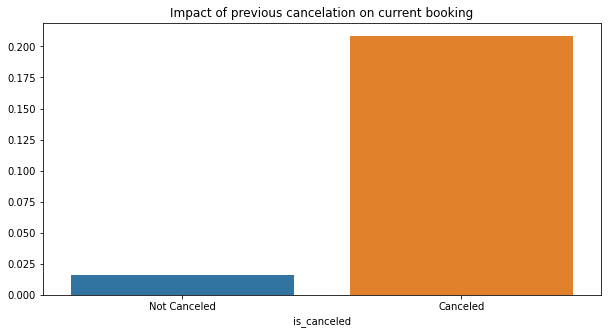

In [ ]:
# Grouping the previous cancelations based on the column is_canceled.
prev_cancels = data.groupby('is_canceled')['previous_cancellations'].mean()

# Visualizing the impact of previous cancellations on the current booking
plt.figure(figsize=(10,5))
sns.barplot(x = prev_cancels.index, y = prev_cancels.values).set_xticklabels(['Not Canceled', 'Canceled'])
plt.title('Impact of previous cancelation on current booking')

### <b> Observation: </b>
Customers who have a history of cancelling the bookings are the ones who tend to cancel the current booking. 

## <b> Which are the busiest months?

In [19]:
# Separating the data on hotel type into two new dataframes for simplicity and taking only those observations which are not canceled to see the actual traffic of visitors
resort = data.loc[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
city = data.loc[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [ ]:
# Creating new dataframe containing information grouped on months
monthly_resort_guests = resort.groupby('arrival_date_month')['hotel'].count().reset_index().rename(columns={'hotel':'Number of guests'})
monthly_city_guests = city.groupby('arrival_date_month')['hotel'].count().reset_index().rename(columns={'hotel':'Number of guests'})

# Adding a new column to both the dataframe which can tell the hotel type.
monthly_resort_guests['Hotel']='Resort Hotel'
monthly_city_guests['Hotel']='City Hotel'

# creating mapping for the months in order to arrange the dataframe from jan to dec 
# mapping dictionary
mapping={'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}

# mapping the dictionary to the column map_month
monthly_resort_guests['map_month']=monthly_resort_guests['arrival_date_month'].map(mapping)
monthly_city_guests['map_month']=monthly_city_guests['arrival_date_month'].map(mapping)

# sorting the dataframe based on the months.
monthly_resort_guests.sort_values(by='map_month', inplace=True)
monthly_city_guests.sort_values(by='map_month', inplace=True)

# concatenating the two dataframes created

total_monthly_guests = pd.concat([monthly_city_guests,monthly_resort_guests], ignore_index=True)

# Dropping the colums map_months
total_monthly_guests.drop('map_month', inplace=True, axis=1)

# having a look at the dataframe
total_monthly_guests

,arrival_date_month,Number of guests,Hotel
0,January,2254,City Hotel
1,February,3064,City Hotel
2,March,4072,City Hotel
3,April,4015,City Hotel
4,May,4579,City Hotel
5,June,4366,City Hotel
6,July,4782,City Hotel
7,August,5381,City Hotel
8,September,4290,City Hotel
9,October,4337,City Hotel


In [ ]:
# having a look at the observations with respect to the month and year.
pd.crosstab(data['arrival_date_month'],data['arrival_date_year'])   #crosstab gives a cross table for two columns. it makes analysis easy.

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,0,5428,5661
August,3889,5063,4925
December,2920,3860,0
February,0,3891,4177
January,0,2248,3681
July,2776,4572,5313
June,0,5292,5647
March,0,4824,4969
May,0,5478,6313


## <b> Observations: </b>

Data observations start from 2015 july till 2017 august.

Only two months - July and august have data for the three years.

Rest all the months have data for two years only.

We will normalize the data in order to get unbiased analysis.

In [ ]:
# Normalizing the data

total_monthly_guests.loc[(total_monthly_guests['arrival_date_month']=='July') | (total_monthly_guests['arrival_date_month']=='August'),'Number of guests']/=3
total_monthly_guests.loc[~((total_monthly_guests['arrival_date_month']=='July') | (total_monthly_guests['arrival_date_month']=='August')),'Number of guests']/=2

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

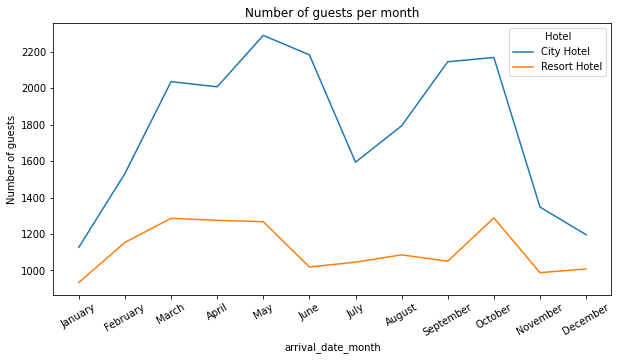

In [ ]:
# visualizing the number of guests for the months.

plt.figure(figsize=(10,5))
sns.lineplot(x='arrival_date_month', y='Number of guests', hue='Hotel', data=total_monthly_guests)
plt.title('Number of guests per month')
plt.xticks(rotation=30)

### <b> Observations: </b>

For City Hotel: 
1. City Hotel has more guests during the spring and autumn season.
2. In july august we see less visitors.

for Resort Hotel:
* We see footfall going down from june to september.
* Resort hotels are mostly booked and preferred by customers in October.

Both the hotels see less visitors in the winter.

So we conclude that, Customers prefer springs and autumn season to travel and book a hotel. These are the busiest months for the hotels.

## <b>What are the prices of different room type paid by the customers ?

In [75]:
# For this we consider only those customers who have not cancelled the booking in order to get somewhat accurate results.
# We will use the two dataframe resort and city created above which have observations of resort hotel and city hotel.

# We add a new column average daily rate per person in the dataframes: resort and hotel to know price per person for the room. Considering only children and adults as guests and not babies.

resort['avg_per_person'] = resort['average_daily_rate']/ (resort['adults'] + resort['children'])
city['avg_per_person'] = city['average_daily_rate']/ (city['adults'] + city['children'])


# Concatenating the above two dataframes

actual_guests = pd.concat([resort,city], ignore_index=True)

In [ ]:
# Taking only necessary columns for simplicity
# sorting on the reserved room type to get the room type in order
actual_guests_price = actual_guests[['hotel', 'reserved_room_type', 'avg_per_person']].sort_values(by='reserved_room_type')

# having a look at the dataframe
actual_guests_price.head() 

,hotel,reserved_room_type,avg_per_person
37582,City Hotel,A,68.850
45923,City Hotel,A,55.675
45924,City Hotel,A,49.830
45926,City Hotel,A,64.000
45927,City Hotel,A,64.500


Text(0.5, 0, 'Room Type')

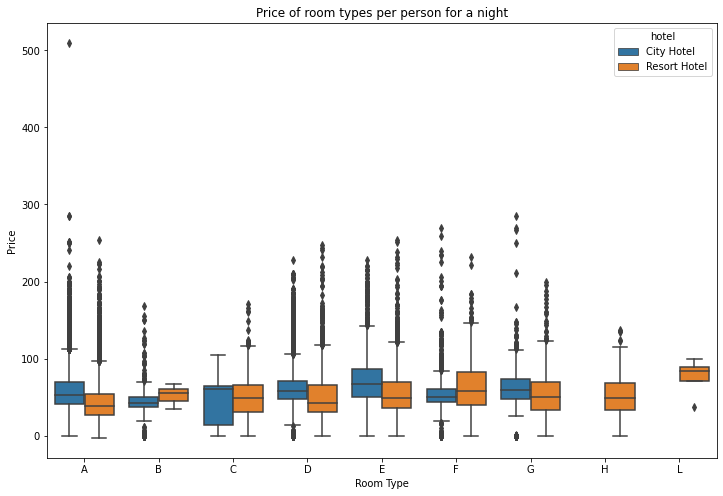

In [ ]:
# visualizing the average price per person with the room type for City and Resort hotels using Box Plot

plt.figure(figsize=(12,8))
sns.boxplot( x = 'reserved_room_type', y = 'avg_per_person', hue='hotel', data=actual_guests_price)
plt.title('Price of room types per person for a night')
plt.ylabel('Price')
plt.xlabel('Room Type')

<b> The graph shows the average price per room for a night

## <b> Let's see how the price per night vary over the months

In [ ]:
# we use the same dataframe actual_guests created above which have only non-canceled observations.
# we take only required columns for simplicity

monthly_room_prices = actual_guests[['hotel', 'arrival_date_month', 'avg_per_person']]
# monthly_room_prices.head()

,hotel,arrival_date_month,avg_per_person
0,Resort Hotel,July,0.0
1,Resort Hotel,July,0.0
2,Resort Hotel,July,75.0
3,Resort Hotel,July,75.0
4,Resort Hotel,July,49.0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text major ticklabel objects>)

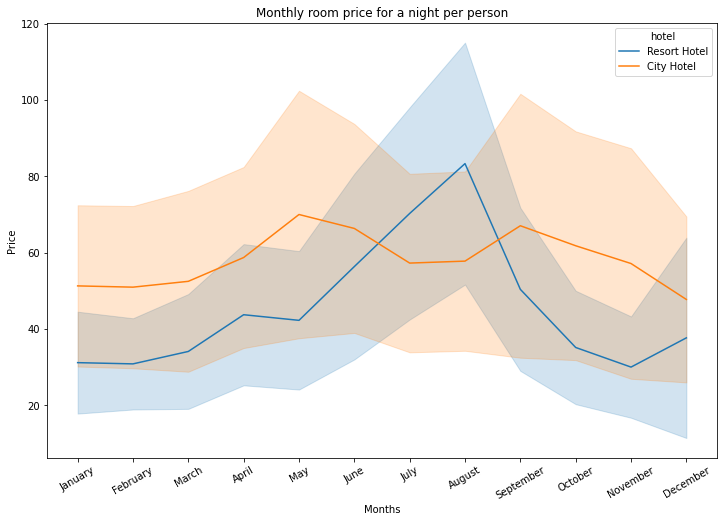

In [ ]:
# Arranging the dataframe in sorting order for months.

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

#ordering by month

monthly_room_prices['arrival_date_month'] = pd.Categorical(monthly_room_prices['arrival_date_month'], categories=months, ordered=True)

# lineplot of price over the months

plt.figure(figsize=(12,8))
sns.lineplot( x = 'arrival_date_month', y= 'avg_per_person', hue = 'hotel',  data=monthly_room_prices, ci='sd')  # ci='sd' shows the standard deviations in the data
plt.title('Monthly room price for a night per person')
plt.xlabel('Months')
plt.ylabel('Price')
plt.xticks(rotation = 30)  # rotates the axis ticks by the degree specified

### <b> Observations: </b>

<b>Resort Hotel:</b>
* Prices for resort hotel varies alot and we can see extremely higher prices during summers for resort hotel type.

<b>City Hotel:</b>
* Prices seem to be varying less.
* City hotel is expensive during spring and autumn seasons.

<b>Best time to book hotel</b>

Best time to book a hotel is when the prices are lower.

* For Resort Hotel customers can book hotel avoiding months where prices are exceptionally high i.e. july-september.

* For city hotel though the prices do not very much it is fine to book throughtout the year, july-august can be a considerable time to book too.
* Prices are always low in winters, it can be considered if one is looking for cheap prices.

<b>Reference to graph of busy months during an year:</b>

Refering to the visualization of the busiest month in terms of actual visitors traffics.
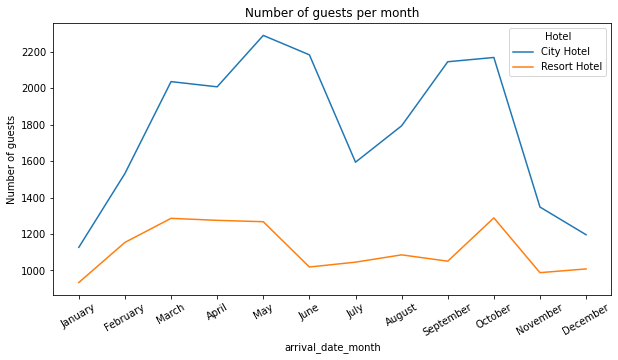


* We saw Resort hotels being booked less between june to september. This is also the period where we see an exceptional higher price range for Resort Hotel.

* City hotels mostly had greater footfalls during spring and autumn, the period where the prices are also higher. But as prices of city hotels do not vary ,uch so people might consider city hotels even in higher prices.

* In winters prices for both the hotels is lower than other months.

## <b>How long customers stay at a hotel ?

In [ ]:
data_copy = data[data['is_canceled']==0]  #creating a copy to avoid changes made to the main data and taking only non canceled observations

# creating a new column which will have bins corresponding to the total days of stay

data_copy['total_nights'] = data_copy['stays_in_weekend_nights']+data_copy['stays_in_week_nights']  #col to read the length of complete stay

data_copy['bin_total_nights']='1 night'
data_copy.loc[(data_copy['total_nights'] > 1) & (data_copy['total_nights'] <= 5), 'bin_total_nights'] = '2-5 nights'
data_copy.loc[(data_copy['total_nights'] > 5) & (data_copy['total_nights'] <= 10), 'bin_total_nights'] = '6-10 nights'
data_copy.loc[data_copy['total_nights'] > 10, 'bin_total_nights'] = '11 nights and above'

data_copy

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,avg_per_person,total_nights,bin_total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0,1 night
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.00,0,0,Check-Out,2015-07-01,0.000000,0,1 night
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,1,1 night
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.00,0,0,Check-Out,2015-07-02,75.000000,1,1 night
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.00,0,1,Check-Out,2015-07-03,49.000000,2,2-5 nights
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394,0,Transient,96.14,0,0,Check-Out,2017-09-06,48.070000,7,6-10 nights
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9,0,Transient,225.43,0,2,Check-Out,2017-09-07,75.143333,7,6-10 nights
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9,0,Transient,157.71,0,4,Check-Out,2017-09-07,78.855000,7,6-10 nights
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89,0,Transient,104.40,0,0,Check-Out,2017-09-07,52.200000,7,6-10 nights


In [ ]:
data_copy.groupby('hotel')['bin_total_nights'].value_counts().to_frame()

bin_total_nights
hotel        bin_total_nights                     
City Hotel   2-5 nights                      33812
             1 night                          9477
             6-10 nights                      2779
             11 nights and above               160
Resort Hotel 2-5 nights                      13539
             6-10 nights                      7260
             1 night                          6952
             11 nights and above              1187

In [ ]:
# checking the frequency of each category for Resort and City Hotel.
value_counts_city_hotel = data_copy.loc[data['hotel']=='City Hotel','bin_total_nights'].value_counts().reset_index().rename(columns={'index': 'Night Bins', 'bin_total_nights':'guests'})
value_counts_resort_hotel = data_copy.loc[data['hotel']=='Resort Hotel','bin_total_nights'].value_counts().reset_index().rename(columns={'index': 'Night Bins', 'bin_total_nights':'guests'})


# adding a new col to above which can separate data for resort hotel and city hotel.
value_counts_city_hotel['Hotel']='City Hotel'
value_counts_resort_hotel['Hotel']='Resort Hotel'


# checking how the dataframes look.
value_counts_resort_hotel


,Night Bins,guests,Hotel
0,2-5 nights,13539,Resort Hotel
1,6-10 nights,7260,Resort Hotel
2,1 night,6952,Resort Hotel
3,11 nights and above,1187,Resort Hotel


Text(0, 0.5, 'Guests count')

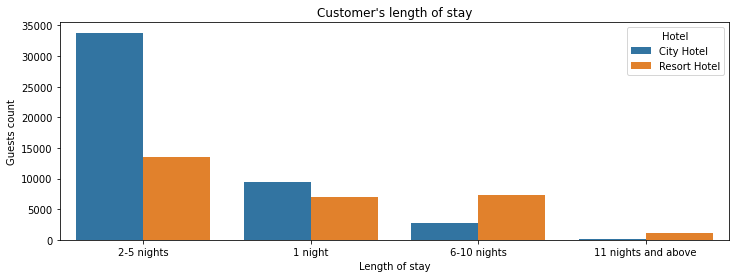

In [ ]:
# concatenating the two dataframes for visualization

stay_data = pd.concat([value_counts_city_hotel, value_counts_resort_hotel], ignore_index = True)

# Visualizing through bar plot the Night bins and the guests column from datafram - stay_data

plt.figure(figsize=(12,4))
sns.barplot( x = 'Night Bins', y = 'guests', hue = 'Hotel', data = stay_data)
plt.title("Customer's length of stay")
plt.xlabel('Length of stay')
plt.ylabel('Guests count')

### <b> Observations: </b>

* People choose to stay for 2-5 nights in city hotels.
* For resort hotels, people prefer to stay for 2-5 nights but we can also see a good number of people preferring to stay for 1 night and 6-10 nights too.

## <b> Optimal length of stay to get the best average daily price

([0, 1, 2, 3], <a list of 4 Text major ticklabel objects>)

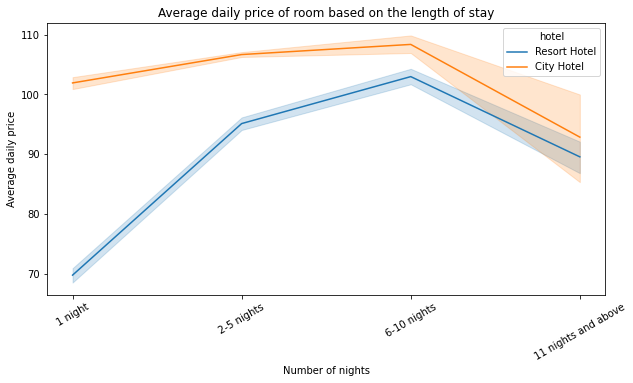

In [ ]:
# Visualizing the average daily rate based on the length of stay.


plt.figure(figsize=(10,5))
sns.lineplot(x = 'bin_total_nights', y = 'average_daily_rate', hue='hotel', data= data_copy)
plt.title('Average daily price of room based on the length of stay')
plt.xlabel('Number of nights')
plt.ylabel('Average daily price')
plt.xticks(rotation=30)

### <b> Observations: </b>

<b>City Hotel:</b>
* One can see that if a person has stayed for more than 11 nights he got an exceptionally low price per day deal.

<b> Resort Hotel: </b>

* When a person has stayed for a single night a lower price of room can be seen and room prices increase as the number of days are increasing.
* But when a person has booked for 11 nights or more he got a price lower than 2-5 nights and 6-10 nights.

## <b> Meals preferred by customers

BB           57799
HB            9479
SC            6684
Undefined      883
FB             320
Name: meal, dtype: int64


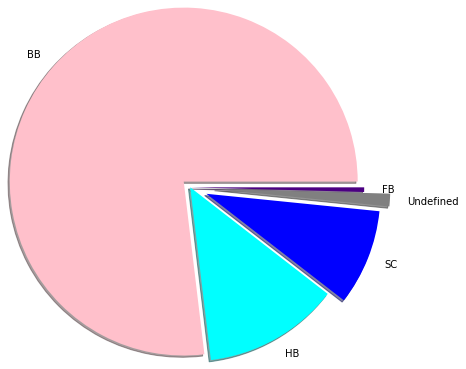

In [76]:
# Visualizing the count of people who have opted for different meal types offered by the hotels.

meal_pref = actual_guests['meal'].value_counts()
print(meal_pref)
 
# Creating explode data
explodes = (0.1, 0.0, 0.2, 0.3, 0.0)
 
# Creating color parameters
colors = ( "pink", "cyan", "blue","grey", "indigo")

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

plt.pie(meal_pref.values, labels = meal_pref.index, radius=2,explode = explodes, shadow = True, colors = colors)
plt.show()

### <b>Observation:</b>
* Around 75% of the customers prefer BB: Bed and Breakfast. 
* Only a few considers Full Board and Half Board.
* It might be because of the higher prices for HB and FB compared to BB.
* On a personal note, breakfasts have a better and a varied menu as compared to diiners and lunches. This could also be the reason for customers to choose only Breakfasts.

        meal  average_daily_rate
0         BB           97.148730
1         FB          133.309656
2         HB          118.621366
3         SC           97.421278
4  Undefined           93.258245


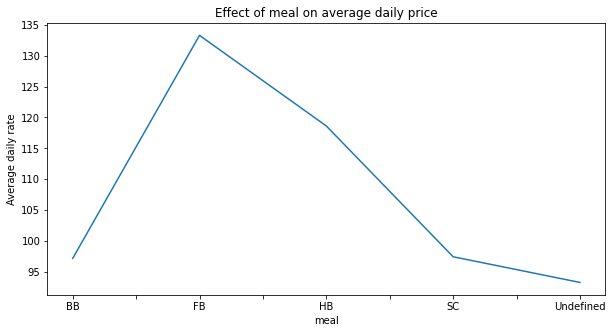

In [77]:
# Effect of meals on average daily price of rooms.

plt.figure(figsize=(10,5))
adr_meal = actual_guests.groupby('meal')['average_daily_rate'].mean().reset_index()
print(adr_meal)
actual_guests.groupby('meal')['average_daily_rate'].mean().plot.line()
plt.title('Effect of meal on average daily price')
plt.ylabel('Average daily rate')
plt.show()

### <b> Observations: </b>
* It is evident that HB- half board and FB- full board increases the average room price by 20 and 15 respectively from Bed and Breakfast.
* Undefined are those who have not included meal with their stays these meals types are associated with the lowest average price of the room.
* A Bed and Breakfast costs similar to SC- self catering where customers have access to kitchen and they can prepere their own meals. People who are health conscious and want to know what all gets into their meal prefers SC in which they can prepare their meal by themselves.
* We can conclude that including only breakfast to their room type increases the average room price by only 5, which is why including a breakfast with a room is a preference for the customers as it is the most booked evident from the pie chart just above.

## <b> Special Requests

hotel         total_of_special_requests
City Hotel    0                            21617
              1                            16699
              2                             6403
              3                             1307
              4                              177
              5                               25
Resort Hotel  0                            15144
              1                             9209
              2                             3700
              3                              744
              4                              127
              5                               13
Name: total_of_special_requests, dtype: int64




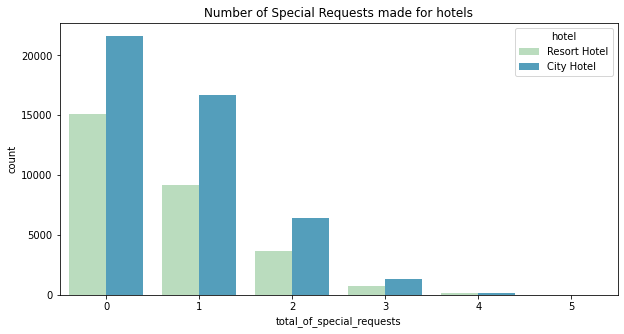

In [78]:
# Special requests made by the customers with different hotel type.
# Using the dataframe actual_guests which have only non-cancelled observations.

print(actual_guests.groupby('hotel')['total_of_special_requests'].value_counts())   #data_copy are only those observations which are not canceled.
print('\n')
plt.figure(figsize=(10,5))
sns.countplot(actual_guests['total_of_special_requests'], hue=actual_guests['hotel'], palette = 'GnBu')
plt.title('Number of Special Requests made for hotels')
plt.show()

### <b> Observations:</b>
* Around 40% of the customers who have booked city or resort hotels have not made any special requests.
* Around 16k customers who have booked city hotels have made a single special request. Around 9k customers have made one special request to resort hotel.
* Maximum of 5 special requests have been made by customers for both the hotels.
* A very few people have made 5 special requests. 

##<b> Effect of price on special requests

In [79]:
# Visualizing if a person who pays a higher average daily price is more likely to make a request or not.

# Considering the non canceled observations: actual_guests dataframe
adr_requests = actual_guests.groupby('total_of_special_requests')['average_daily_rate'].mean().reset_index()
adr_requests

,total_of_special_requests,average_daily_rate
0,0,89.798174
1,1,105.450274
2,2,117.060858
3,3,124.313959
4,4,131.902237
5,5,128.233158


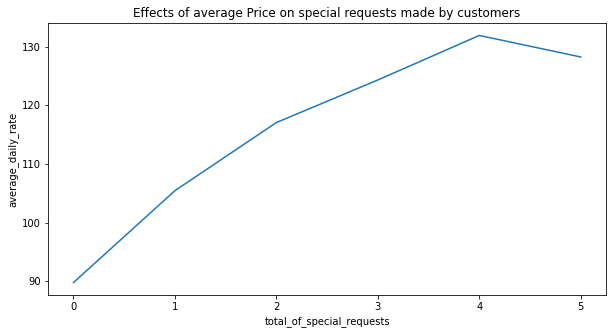

In [ ]:
# Visualizing using line plot

plt.figure(figsize=(10,5))
sns.lineplot(x = 'total_of_special_requests', y='average_daily_rate', data = adr_requests)
plt.title('Effects of average Price on special requests made by customers')
plt.show()

###<b> Observations: </b>
* Customers who are paying a high average price for a room are more likely to make special requests to the hotels.
* An increasing number of requests can be seen with an increase in the average price of the room.
* So Hotels are more likely to have requests from customers according to the price of the room.

## <b> Preferred Room Type

In [ ]:
# Based on the hotel type we now will see which room type is preferred by the customers.

# only non cancelled observations to get accurate analysis.
resort = data.loc[(data['hotel']=='Resort Hotel') & (data['is_canceled']==0)]
city = data.loc[(data['hotel']=='City Hotel') & (data['is_canceled']==0)]

In [ ]:
# creating two dataframe having counts of customers based on preference of room type.
resort_room_pref = resort['reserved_room_type'].value_counts().reset_index().rename(columns={'index':'room type', 'reserved_room_type':'count'})
city_room_pref = city['reserved_room_type'].value_counts().reset_index().rename(columns={'index':'room type', 'reserved_room_type':'count'})

# adding a column of hotel type to both dataframe before conctenating.

resort_room_pref['Hotel']='Resort Hotel'
city_room_pref['Hotel'] = 'City Hotel'

# concatenating the two dataframes for visualization

preffered_room_df = pd.concat([resort_room_pref, city_room_pref], ignore_index = True)

# having a look at the created dataframe
preffered_room_df.head()

,room type,count,Hotel
0,A,17016,Resort Hotel
1,D,5478,Resort Hotel
2,E,3573,Resort Hotel
3,G,966,Resort Hotel
4,F,926,Resort Hotel


Text(0.5, 1.0, 'Customers preferenece of room type for Resort and City Hotel')

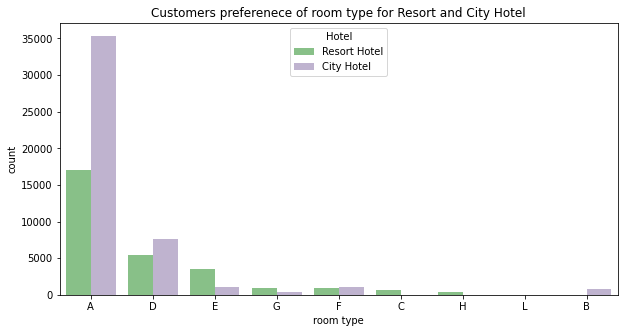

In [ ]:
# Visualizing the preference of room type for both the hotels

plt.figure(figsize=(10,5))
sns.barplot(y = 'count', x = 'room type', hue = 'Hotel', data = preffered_room_df, palette = 'Accent')
plt.title('Customers preferenece of room type for Resort and City Hotel')

### <b> Observations: </b>
* A type room can be seen a preference for the customers for Resort as well as City type hotels.
* We can say A type room is the basic standard room with the necessary amenitites offered by both the hotels.

##<b>Bookings by different Market Segment

In [81]:
# taking only non cancelled observations so using the dataframe actual_guests.

market_segments = actual_guests['market_segment'].value_counts()

# visualising the differrent market segment frequency using pie plot.
px.pie(market_segments, values = market_segments.values, names = market_segments.index, title = 'booking by different market segment').update_traces(textinfo = 'percent+label')


### <b> Observations </b>

* Market segment: Online TA is the segment widely used by customer for the bookings.
* Offline TA/To is the second preference of customers to book a room in a hotel.
* 14% of the people make a direct booking.
* We can see 10% of the bookings through groups.

## <b> Effect of market segment on average daily price



In [82]:
# using the dataframe actual_guests created earlier (in which we have calculated the avg price per person of the bookings for only non cancelled bookings) for the visualization

actual_guests.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,avg_per_person
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,0,Transient,75.0,0,0,Check-Out,2015-07-02,75.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,0,Transient,98.0,0,1,Check-Out,2015-07-03,49.0


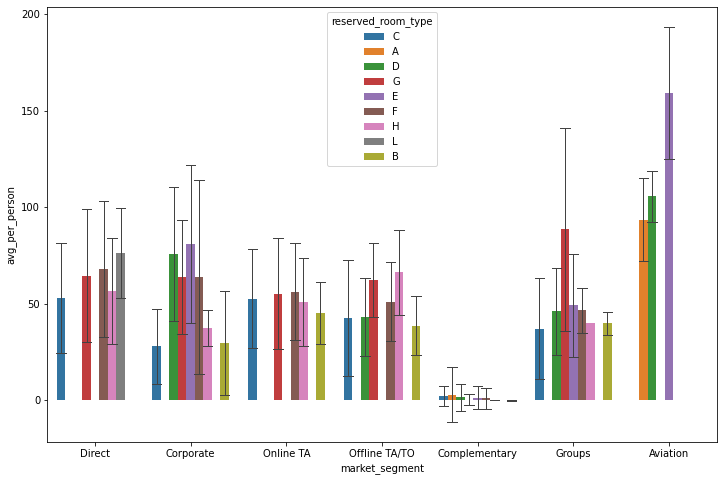

In [83]:
# using bar plot to see the price ranges for different market segment.

plt.figure(figsize=(12,8))
sns.barplot(y='avg_per_person', x='market_segment', hue='reserved_room_type', data= actual_guests, ci='sd', errwidth=1, capsize=0.1)

### <b> Observations </b>

* On average we can see aviation market segment pays the highest price.
* Groups tend to pay slightly lesser on average. They get a better average deal.

##<b> Understanding why aviation people pay a higher price

In [84]:
# Separating the aviation observations
aviation_data = actual_guests[actual_guests['market_segment']=='Aviation']
 
# statistical analysis of the aviation data w.r.t the columns - average price per person, lead time, and number of adults.
aviation_data[['lead_time','adults', 'avg_per_person']].describe()

,lead_time,adults,avg_per_person
count,185.000000,185.000000,183.000000
mean,4.140541,1.005405,99.640328
std,4.052875,0.164756,20.443214
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,95.000000
50%,3.000000,1.000000,95.000000
75%,6.000000,1.000000,110.000000
max,21.000000,2.000000,193.500000


### <b> Observations </b>

* Aviation people generally book for their crews to stay, so the lead time can be seen at an average of 4 days which is quite lesser than for non airline customers.
* Generally, one room per crew is booked for airline people, so they book more room than required by a family.

## <b> Correlation between the features 

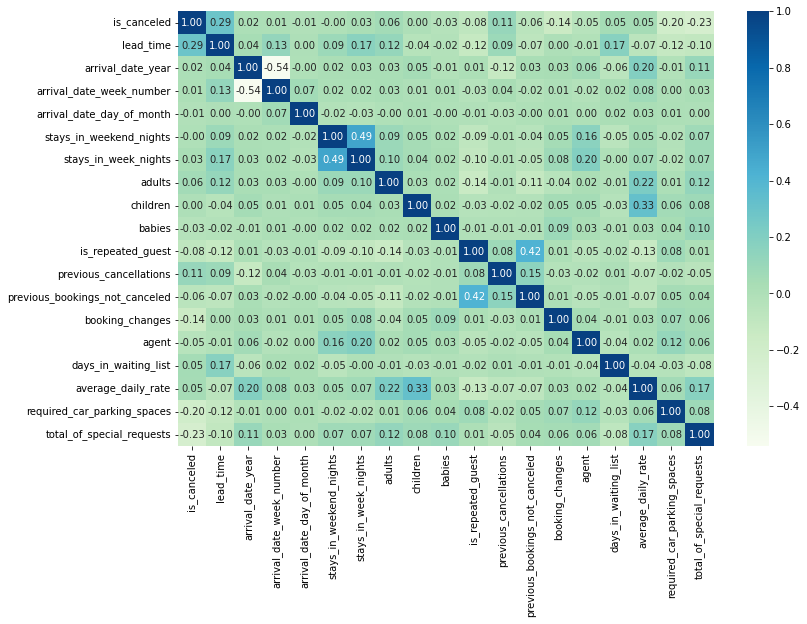

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot = True, fmt = '.2f', cmap='GnBu')

### <b> Observations </b>

* feature previous_bookings_not_canceled is correlated positively with is_repeated_guests.
* Average daily rate is positively correlated with adults and children which means that average daily rate increases as the number of adults or children increses.
* Booking getting canceled depends positively on lead time, we have also observed it graphically above.
* features stay_in_week_nights and stay_in_weekend_nights are also positively correlaetd.


#<b> Visualizing the positively correlated features

## <b>Stays_in_week_nights and stays_in_weekend_nights

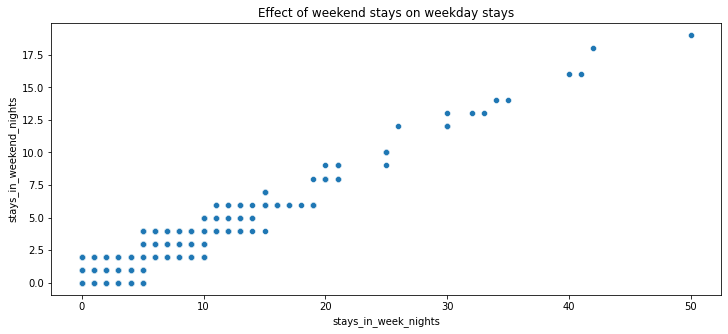

In [134]:
# visualizing using scatter plot
plt.figure(figsize=(12,5))
sns.scatterplot(x='stays_in_week_nights', y='stays_in_weekend_nights', data=actual_guests)  #actual_guests: non cancelled observations
plt.title('Effect of weekend stays on weekday stays')
plt.show()

### <b>  Observation: </b>

As the two were correlated we can also see through the scatter plot that when number of stays in weekdays increases we can see an increase in the number of stays in weekends.

## <b> Adults and average daily rate

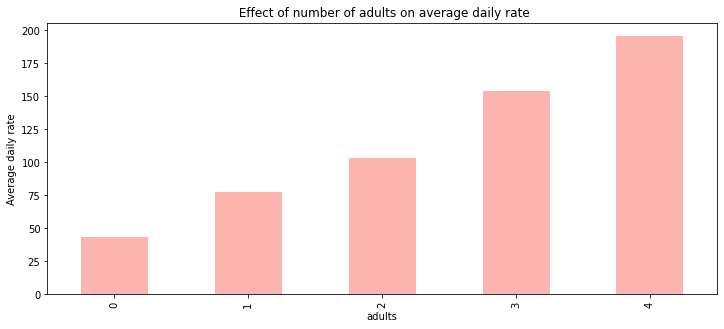

In [132]:
# Visualizing using barplot
plt.figure(figsize=(12,5))
actual_guests.groupby('adults')['average_daily_rate'].mean().plot.bar(cmap='Pastel1')     #actual_guests: non cancelled observations
plt.title(' Effect of number of adults on average daily rate')
plt.ylabel('Average daily rate')
plt.show()

### <b> Observation: </b>

As the number of adults increases we can see and increase in the average daily price as was also observed in the correlation heatmap that the two features are positively correlated.

## <b> Children and average daily rate

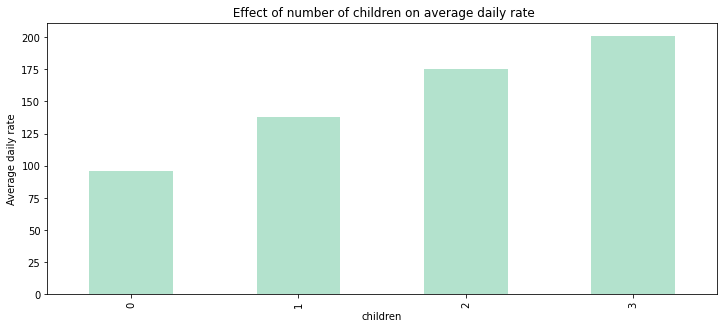

In [131]:
# Visualizing using barplot
plt.figure(figsize=(12,5))
actual_guests.groupby('children')['average_daily_rate'].mean().plot.bar(cmap='Pastel2')       #actual_guests: non cancelled observations
plt.title(' Effect of number of children on average daily rate')
plt.ylabel('Average daily rate')
plt.show()

### <b> Observation: </b>
We can see that as the number of children increases the average daily rate also increases. The two features are positively correlated.